In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch

In [2]:
df = pd.read_table('iris.data',sep=',', names=['Sepal_length','Sepal_width','Petal_length','Petal_width','Species'])
print(df)
X = df.iloc[:, :4] # 除了class以外所有行
y = np.array(df['Species'].factorize()[0]) # class真實值

     Sepal_length  Sepal_width  Petal_length  Petal_width         Species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


Text(0.5, 1.0, 'Sepal length and width')

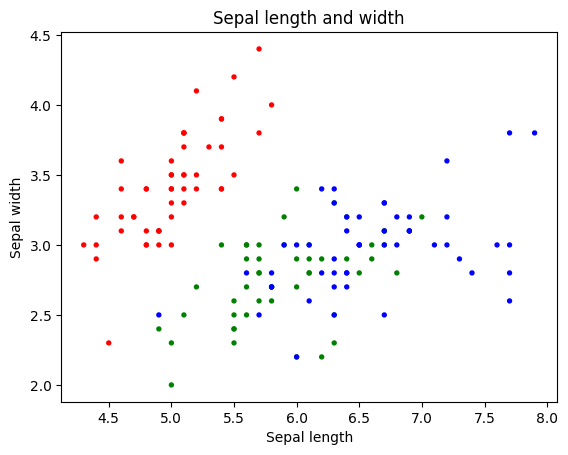

In [3]:
#Sepal長寬視覺化
plt.figure(1)
colors = {'Iris-setosa':'red', 'Iris-virginica':'blue', 'Iris-versicolor':'green'}
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], color=df['Species'].map(colors), s=8)  
plt.xlabel('Sepal length')  
plt.ylabel('Sepal width') 
plt.title('Sepal length and width')

Text(0.5, 1.0, 'Petal length and width')

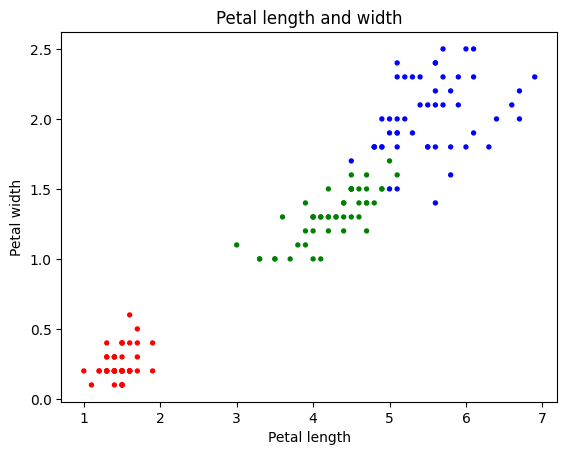

In [4]:
# Petal長寬視覺化
plt.figure(2)
plt.scatter(X.iloc[:, 2], X.iloc[:, 3], color=df['Species'].map(colors), s=8)  
plt.xlabel('Petal length')  
plt.ylabel('Petal width') 
plt.title('Petal length and width')

In [5]:
def purity_score(y_true, y_pred):
    y_voted_labels = np.zeros(y_true.shape)

    labels = np.unique(y_true)
    ordered_labels = np.arange(labels.shape[0])
    for k in range(labels.shape[0]):
        y_true[y_true==labels[k]] = ordered_labels[k]
  
    labels = np.unique(y_true)
    bins = np.concatenate((labels, [np.max(labels)+1]), axis=0)

    for cluster in np.unique(y_pred):
        hist, _ = np.histogram(y_true[y_pred==cluster], bins=bins)
        # Find the most present label in the cluster
        winner = np.argmax(hist)
        y_voted_labels[y_pred==cluster] = winner

    return accuracy_score(y_true, y_voted_labels)

In [6]:
# K-means
start = time.time()
print("分群所花費時間:")

KM = KMeans(n_clusters=3).fit(X)

end = time.time()
print(end - start)

label_pred = KM.labels_  # cluster標籤
print("K-means分群結果：")
print(label_pred)
print("---")

print("真實結果：")
print(y)

print('Purity得分：%.4f'%(purity_score(y,label_pred)))

分群所花費時間:
0.06982541084289551
K-means分群結果：
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
---
真實結果：
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Purity得分：0.8933


Text(0.5, 1.0, 'K-means Sepal length and width')

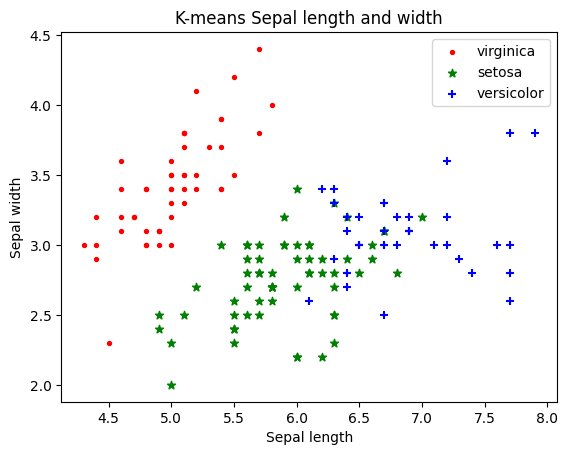

In [7]:
plt.figure(3)
#k-means sepal結果
x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
x2 = X[label_pred == 2]
plt.scatter(x0.iloc[:, 0], x0.iloc[:, 1], c="red", marker='o', label='virginica', s=8)  
plt.scatter(x1.iloc[:, 0], x1.iloc[:, 1], c="green", marker='*', label='setosa')  
plt.scatter(x2.iloc[:, 0], x2.iloc[:, 1], c="blue", marker='+', label='versicolor')  
plt.xlabel('Sepal length')  
plt.ylabel('Sepal width')  
plt.legend()  
plt.title('K-means Sepal length and width')

Text(0.5, 1.0, 'K-means Petal length and width')

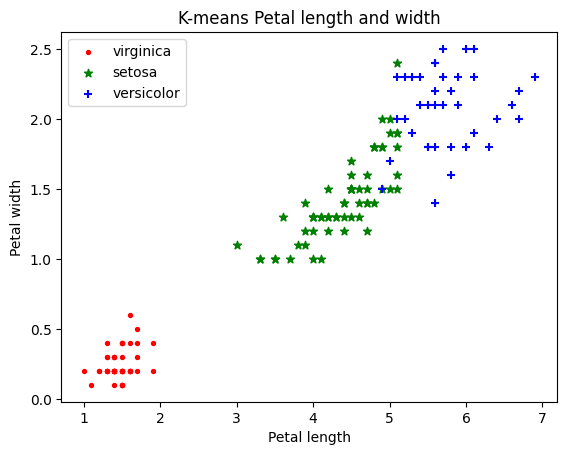

In [8]:
plt.figure(4)
# k-means petal結果
x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
x2 = X[label_pred == 2]
plt.scatter(x0.iloc[:, 2], x0.iloc[:, 3], c="red", marker='o', label='virginica', s=8)  
plt.scatter(x1.iloc[:, 2], x1.iloc[:, 3], c="green", marker='*', label='setosa')  
plt.scatter(x2.iloc[:, 2], x2.iloc[:, 3], c="blue", marker='+', label='versicolor')  
plt.xlabel('Petal length')  
plt.ylabel('Petal width')  
plt.legend()  
plt.title('K-means Petal length and width')

In [9]:
# 階層式
start = time.time()
print("分群所花費時間:")

hcluster = AgglomerativeClustering(n_clusters=3).fit(X)

end = time.time()
print(end - start)

label_pred = hcluster.labels_  # cluster標籤
print("階層式分群結果：")
print(label_pred)
print("---")

print("真實結果：")
print(y)

print('Purity得分：%.4f'%(purity_score(y,label_pred)))

分群所花費時間:
0.0019948482513427734
階層式分群結果：
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
---
真實結果：
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Purity得分：0.8933


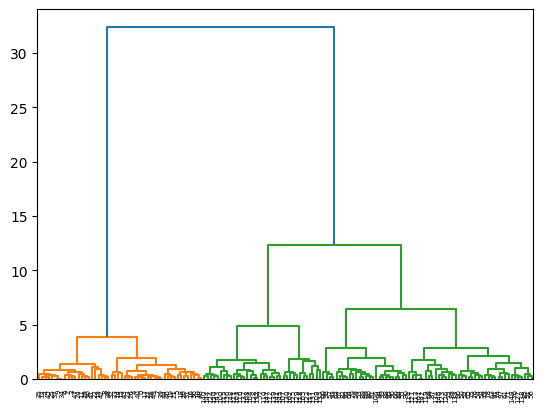

In [10]:
plt.figure(5)
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

Text(0.5, 1.0, 'Hierarchical Sepal length and width')

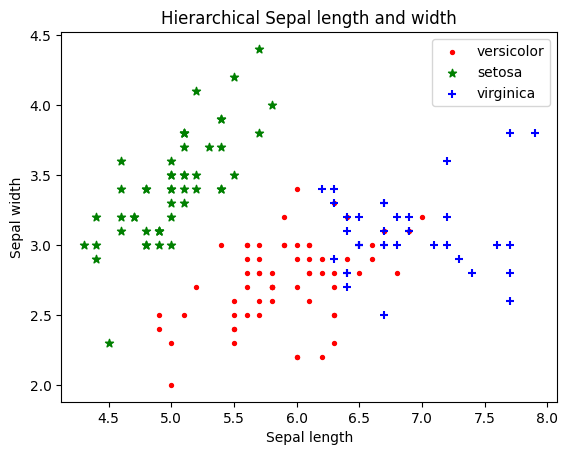

In [11]:
plt.figure(6)
# 階層式 sepal結果
x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
x2 = X[label_pred == 2]
plt.scatter(x0.iloc[:, 0], x0.iloc[:, 1], c="red", marker='o', label='versicolor', s=8)  
plt.scatter(x1.iloc[:, 0], x1.iloc[:, 1], c="green", marker='*', label='setosa')  
plt.scatter(x2.iloc[:, 0], x2.iloc[:, 1], c="blue", marker='+', label='virginica')  
plt.xlabel('Sepal length')  
plt.ylabel('Sepal width')  
plt.legend()  
plt.title('Hierarchical Sepal length and width')

Text(0.5, 1.0, 'Hierarchical Petal length and width')

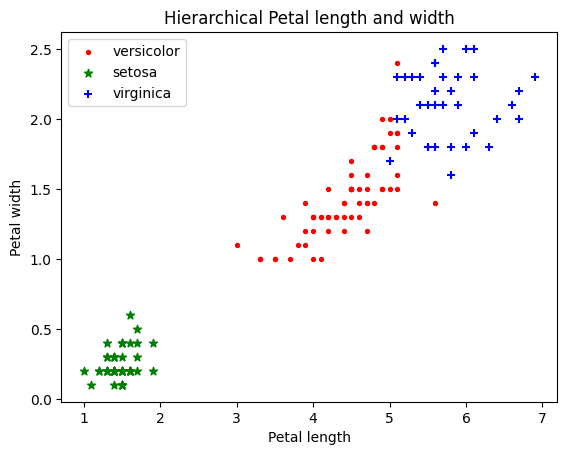

In [12]:
plt.figure(7)
# 階層式 petal結果
x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
x2 = X[label_pred == 2]
plt.scatter(x0.iloc[:, 2], x0.iloc[:, 3], c="red", marker='o', label='versicolor', s=8)  
plt.scatter(x1.iloc[:, 2], x1.iloc[:, 3], c="green", marker='*', label='setosa')  
plt.scatter(x2.iloc[:, 2], x2.iloc[:, 3], c="blue", marker='+', label='virginica')  
plt.xlabel('Petal length')  
plt.ylabel('Petal width')  
plt.legend()  
plt.title('Hierarchical Petal length and width')

In [13]:
# DBSCAN
start = time.time()
print("分群所花費時間:")

dbscan = DBSCAN(eps=0.5,min_samples=5).fit(X)  # 預設值eps=0.5,min_samples=5

end = time.time()
print(end - start)

label_pred = dbscan.labels_  # cluster標籤
print("DBSCAN分群結果：")
print(label_pred)
print("---")

print("真實結果：")
print(y)

print('Purity得分：%.4f'%(purity_score(y,label_pred)))

分群所花費時間:
0.002992868423461914
DBSCAN分群結果：
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]
---
真實結果：
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Purity得分：0.6867


Text(0.5, 1.0, 'DBSCAN Sepal length and width')

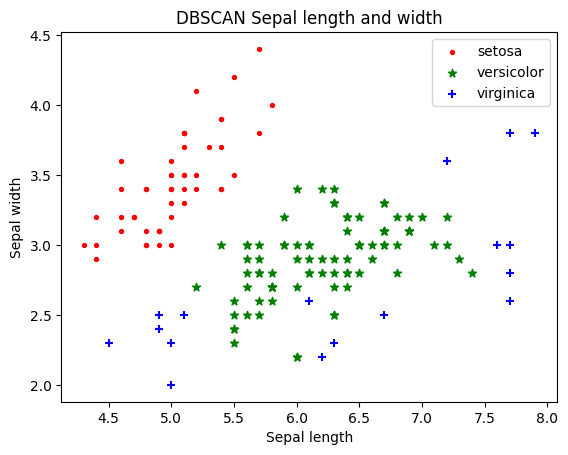

In [14]:
plt.figure(8)
# DBSCAN sepal結果
x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
x2 = X[label_pred == -1]
plt.scatter(x0.iloc[:, 0], x0.iloc[:, 1], c="red", marker='o', label='setosa', s=8)  
plt.scatter(x1.iloc[:, 0], x1.iloc[:, 1], c="green", marker='*', label='versicolor')  
plt.scatter(x2.iloc[:, 0], x2.iloc[:, 1], c="blue", marker='+', label='virginica')  
plt.xlabel('Sepal length')  
plt.ylabel('Sepal width')  
plt.legend()  
plt.title('DBSCAN Sepal length and width')

Text(0.5, 1.0, 'DBSCAN Petal length and width')

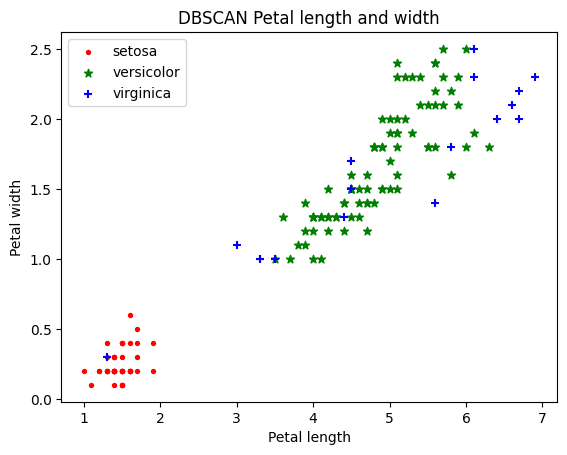

In [15]:
plt.figure(9)
# DBSCAN petal結果
x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
x2 = X[label_pred == -1]
plt.scatter(x0.iloc[:, 2], x0.iloc[:, 3], c="red", marker='o', label='setosa', s=8)  
plt.scatter(x1.iloc[:, 2], x1.iloc[:, 3], c="green", marker='*', label='versicolor')  
plt.scatter(x2.iloc[:, 2], x2.iloc[:, 3], c="blue", marker='+', label='virginica')  
plt.xlabel('Petal length')  
plt.ylabel('Petal width')  
plt.legend()  
plt.title('DBSCAN Petal length and width')